# Convert imbalanced dataset into balanced dataset using down/under sampling technique

Data Source : https://www.kaggle.com/mlg-ulb/creditcardfraud


For Classification Problem, the data in real-world applications/sources are often imbalanced in nature where lionshare data falls under Majority class and very little in Minority class. This is often observed in Fraudalent dataset or health care related dataset. For fraudalent data - majority of data would fall under Genuine where very little fall under Fraud; Similarly, For cancer or diabetic dataset - you will see majority data would be negative (non-cancer or non-diabetic) and minority data would belong to positive (cancer or diabetic). Hence, It is critical step to perform by choosing the proper training data for classification in the imbalanced class distribution problem.
In this Case we would go ahead with under-sampling approaches for selecting dataset as training data to improve the classification accuracy for minory class otherwise Model will be biased with Majority class

To achieve this , we would reduce the dataset of Mojority classes to match the count of Minority classes. This action will eventually create a dataset with equally distributed classes (50:50). 

Cons: With this approach we will lose actual data which could be important for model prediction. Unless there is no other option - we should not go ahead with undersampling. We should try with up sampling or over sampling before trying with down sampling or under sampling.

Typically, undersampling methods are used in conjunction with an oversampling technique for the minority class, and this combination often results in better performance than using oversampling or undersampling alone on the training dataset.

In this example, We will be using NearMiss() to under sample the data. 
Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

In [39]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read credit card fraudalent dataset (from kaggle)
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Handle imbalanced dataset\\creditcard.csv')

In [40]:
# View sample data from dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [44]:
# Check presence of any Null value
df.isnull().values.any()

False

Text(0, 0.5, 'Count')

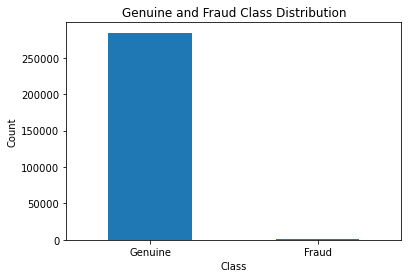

In [45]:
# Check distribution of dataset (check if dataset is imbalanced based on labelled output)
CLASSES = ['Genuine','Fraud']
cnt_classes = pd.value_counts(df['Class'])
cnt_classes.plot(kind = 'bar', rot=0)
plt.title("Genuine and Fraud Class Distribution")
plt.xticks(range(2),CLASSES)
plt.xlabel('Class')
plt.ylabel('Count')

In [46]:
# Count of Geniune Transaction
df[df['Class']==0].shape

(284315, 31)

In [47]:
# Count of Fraud Transaction
df[df['Class']==1].shape

(492, 31)

In [48]:
# Split independent features and output/dependent feature
# Independent Features
X = df.drop('Class',axis=1)
X.shape

(284807, 30)

In [49]:
# Dependent Features
y = df['Class']
y.shape

(284807,)

In [31]:
# Installing imblearn package (imbalanced-learn) in conda
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DasAm\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:


  conda   

In [50]:
# Apply under sampling technique
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X_resample,y_resample = nearmiss.fit_sample(X,y)

In [51]:
# Now total size of the dataset would be twice the size of 492 (Minority dataset - Fraud dataset) ; i.e 984 
X_resample.shape

(984, 30)

In [52]:
# Now total size of the dataset would be twice the size of 492 (Minority dataset - Fraud dataset) ; i.e 984 
y_resample.shape

(984,)

In [53]:
# Check the Fraud and Genuine data distribution after under sampling
from collections import Counter
print('Actual dataset {}'.format(Counter(y)))
print('Undersampled dataset {}'.format(Counter(y_resample)))

Actual dataset Counter({0: 284315, 1: 492})
Undersampled dataset Counter({0: 492, 1: 492})


Text(0, 0.5, 'Count')

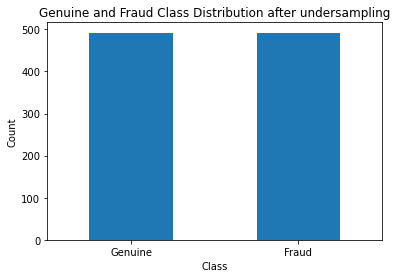

In [54]:
# Equal Distribution of Fraud and Genuine Dataset
CLASSES = ['Genuine','Fraud']
cnt_classes = pd.value_counts(y_resample)
cnt_classes.plot(kind = 'bar', rot=0)
plt.title("Genuine and Fraud Class Distribution after undersampling")
plt.xticks(range(2),CLASSES)
plt.xlabel('Class')
plt.ylabel('Count')